In [2]:
 # installing diffusion models from huggingface
!pip install diffusers transformers gradio accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.8 M

In [3]:
#importing all important modules for this Project

from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
!pip show torch

Name: torch
Version: 2.3.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchtext, torchvision


In [5]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
# Another model for image generation
# model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
prompt = """A majestic dragon soars over a bustling medieval town at sunset. The sky is a mix of orange, pink, and purple hues, casting a warm glow over the stone buildings. Townsfolk in colorful attire look up in awe as the dragon's scales shimmer with an iridescent light. In the town square, a fountain with a statue of a knight stands as a central feature, with market stalls selling various goods and trinkets surrounding it. Trees with autumn leaves add to the vibrant atmosphere, while the distant mountains provide a picturesque backdrop."""

In [7]:
image = pipe(prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (110 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['feature, with market stalls selling various goods and trinkets surrounding it. trees with autumn leaves add to the vibrant atmosphere, while the distant mountains provide a picturesque backdrop.']


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


[PROMPT]:  A majestic dragon soars over a bustling medieval town at sunset. The sky is a mix of orange, pink, and purple hues, casting a warm glow over the stone buildings. Townsfolk in colorful attire look up in awe as the dragon's scales shimmer with an iridescent light. In the town square, a fountain with a statue of a knight stands as a central feature, with market stalls selling various goods and trinkets surrounding it. Trees with autumn leaves add to the vibrant atmosphere, while the distant mountains provide a picturesque backdrop.


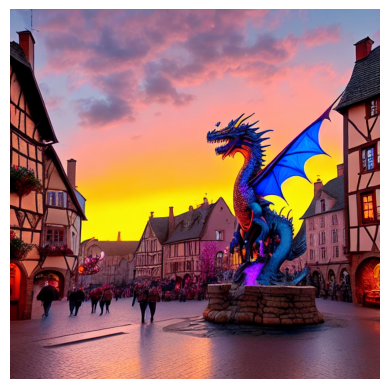

In [8]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [9]:
prompt2 = """In a futuristic cityscape, towering skyscrapers with neon lights pierce the night sky. Hovercars zip through the air, leaving trails of light behind them. The streets below are bustling with people dressed in sleek, high-tech fashion. Robotic vendors line the sidewalks, selling an array of futuristic gadgets and food. Giant holographic advertisements flicker and shift, showcasing the latest technologies and entertainment. In the distance, a monorail glides smoothly along its track, weaving through the maze of buildings. The city is alive with energy and a sense of endless possibilities."""

image = pipe(prompt2).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['latest technologies and entertainment. in the distance, a monorail glides smoothly along its track, weaving through the maze of buildings. the city is alive with energy and a sense of endless possibilities.']


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  In a futuristic cityscape, towering skyscrapers with neon lights pierce the night sky. Hovercars zip through the air, leaving trails of light behind them. The streets below are bustling with people dressed in sleek, high-tech fashion. Robotic vendors line the sidewalks, selling an array of futuristic gadgets and food. Giant holographic advertisements flicker and shift, showcasing the latest technologies and entertainment. In the distance, a monorail glides smoothly along its track, weaving through the maze of buildings. The city is alive with energy and a sense of endless possibilities.


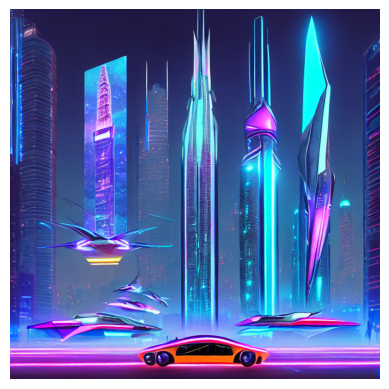

In [10]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

We can customize image output using Stable Diffusion parameters.

1. num inference steps
2. height width
3. num_images_per_prompt
4. negative_prompt

In [11]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [13]:
prompt = "In the heart of Rajasthan, a grand palace rises majestically from the golden sands of the Thar Desert. The intricate architecture of the palace features domes, arches, and minarets adorned with detailed carvings and vibrant colors. Camels and elephants adorned with traditional decorations parade through the courtyard, where people dressed in colorful Rajasthani attire gather for a festival. The air is filled with the sounds of traditional music, the clinking of bangles, and the aroma of spicy street food. As the sun sets, the palace is illuminated, casting a warm glow that contrasts with the cool desert night."

params = {}

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the sounds of traditional music, the clinking of bangles, and the aroma of spicy street food. as the sun sets, the palace is illuminated, casting a warm glow that contrasts with the cool desert night.']


  0%|          | 0/50 [00:00<?, ?it/s]

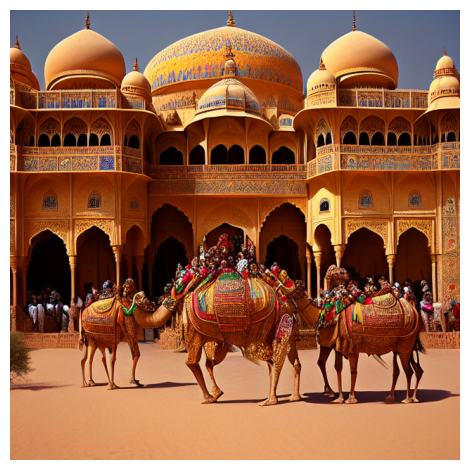

In [14]:
generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the sounds of traditional music, the clinking of bangles, and the aroma of spicy street food. as the sun sets, the palace is illuminated, casting a warm glow that contrasts with the cool desert night.']


  0%|          | 0/100 [00:00<?, ?it/s]

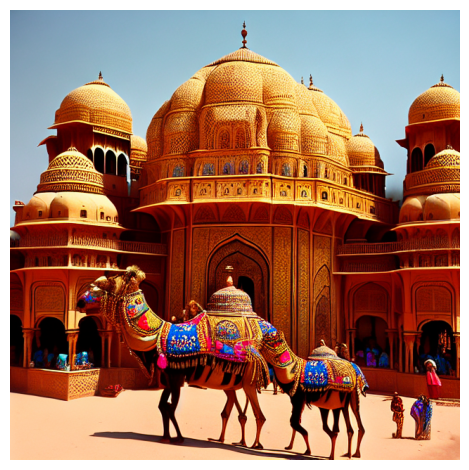

In [15]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the sounds of traditional music, the clinking of bangles, and the aroma of spicy street food. as the sun sets, the palace is illuminated, casting a warm glow that contrasts with the cool desert night.']


  0%|          | 0/10 [00:00<?, ?it/s]

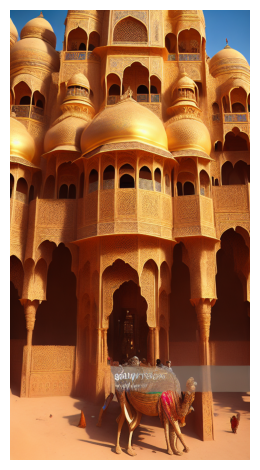

In [16]:
#height width
params = {'num_inference_steps': 10, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['feature, with market stalls selling various goods and trinkets surrounding it. trees with autumn leaves add to the vibrant atmosphere, while the distant mountains provide a picturesque backdrop.']


  0%|          | 0/10 [00:00<?, ?it/s]

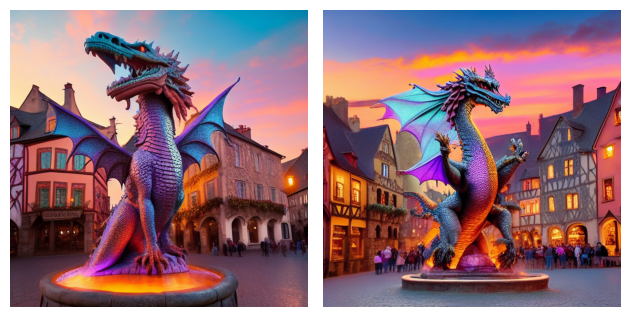

In [12]:
#num_images_per_prompt
params = {'num_inference_steps': 10, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the sounds of traditional music, the clinking of bangles, and the aroma of spicy street food. as the sun sets, the palace is illuminated, casting a warm glow that contrasts with the cool desert night.']


  0%|          | 0/10 [00:00<?, ?it/s]

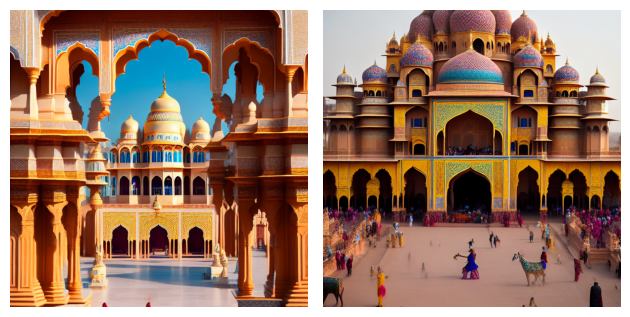

In [19]:
# negative_prompt
params = {'num_inference_steps': 10, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality, camel'}

#input 1
generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['latest technologies and entertainment. in the distance, a monorail glides smoothly along its track, weaving through the maze of buildings. the city is alive with energy and a sense of endless possibilities.']


  0%|          | 0/10 [00:00<?, ?it/s]

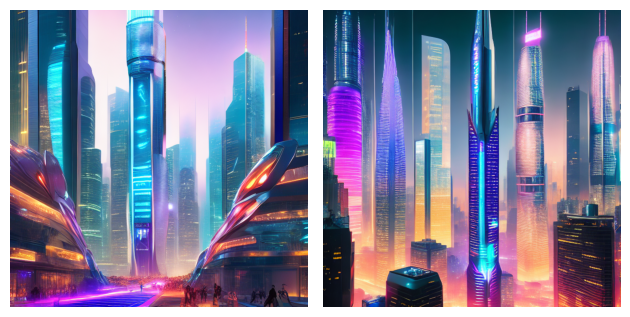

In [18]:
#input 2
generate_image(pipe, prompt2, params)